In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

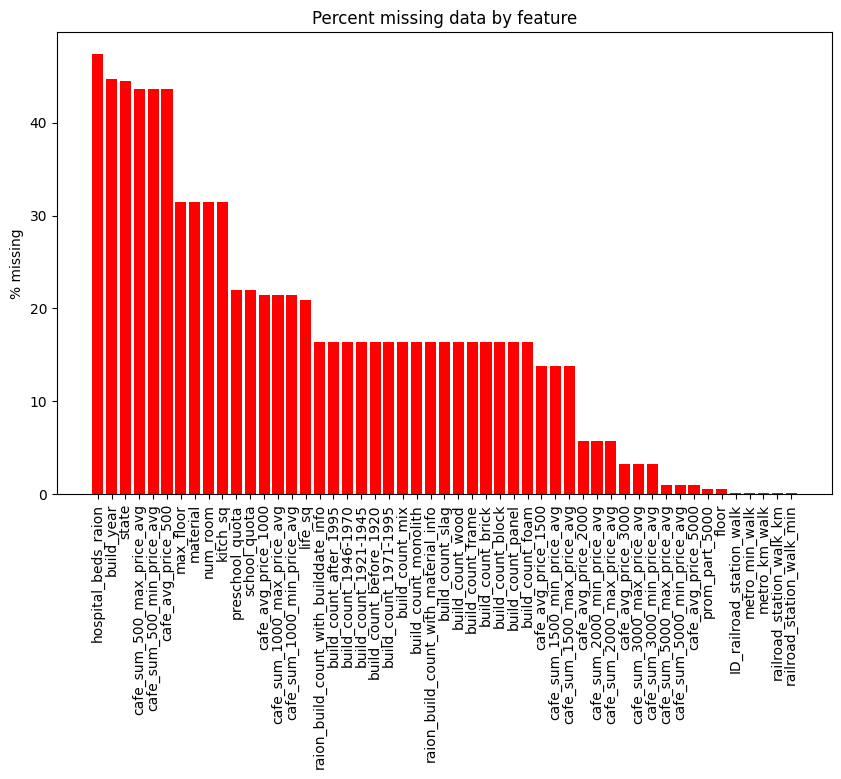

In [9]:
def missing_data_percentage(df):
    # Вычисляем процент пропущенных данных для каждого признака
    miss_pct = df.isnull().sum() / len(df) * 100
    miss_pct = miss_pct[miss_pct > 0] # Отбираем только признаки с пропущенными данными
    
    # Создаем DataFrame с процентами пропущенных данных
    miss_pct_df = pd.DataFrame({'miss': miss_pct, 'var': miss_pct.index})
    
    # Сортируем по убыванию процента пропущенных данных
    miss_pct_df = miss_pct_df.sort_values(by='miss', ascending=False)
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.bar(miss_pct_df['var'], miss_pct_df['miss'], color='red')
    plt.ylabel('% missing')
    plt.title('Percent missing data by feature')
    plt.xticks(rotation=90)  # Поворачиваем подписи на оси абсцисс для лучшей читаемости
    plt.show()


dtrain = pd.read_csv('train.csv')
missing_data_percentage(dtrain)

In [11]:
# Находим самый часто встречающийся элемент в столбце 'state'
most_common_state = dtrain['state'].mode().iloc[0]

# Заменяем ошибочное значение 33 в столбце 'state' на самое часто встречающееся значение
dtrain['state'].replace(33, most_common_state, inplace=True)

# Заменяем ошибочное значение 20052009 в столбце 'build_year' на 2007
dtrain['build_year'].replace(20052009, 2007, inplace=True)


C:\Users\Maksim\AppData\Local\Temp\ipykernel_22876\3730813448.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtrain['build_year'].replace(20052009, 2007, inplace=True)


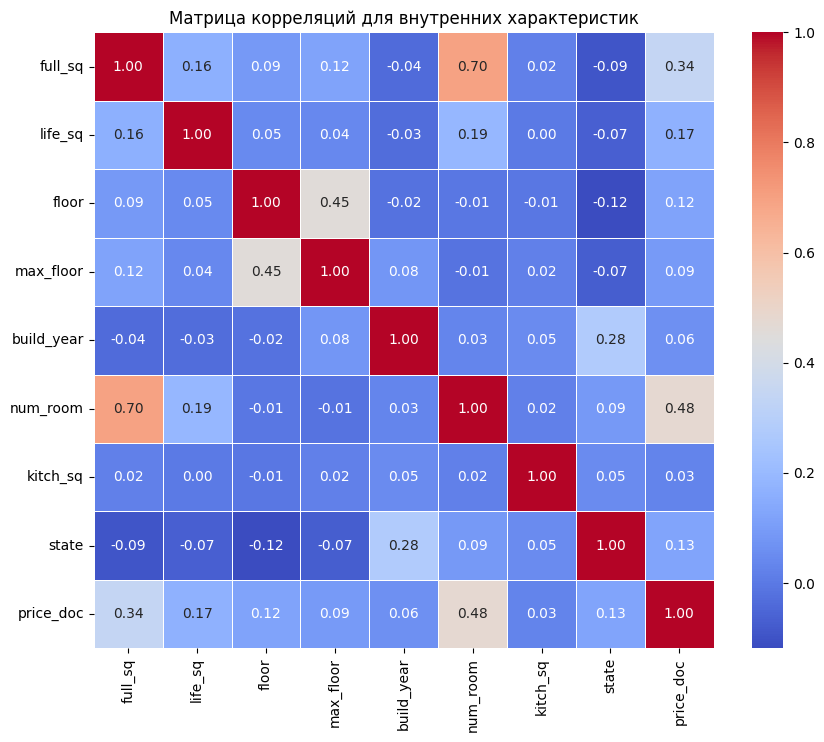

In [13]:
# Выбираем нужные столбцы
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
corr_matrix = dtrain[internal_chars].corr()

# Рисуем матрицу корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляций для внутренних характеристик')
plt.show()


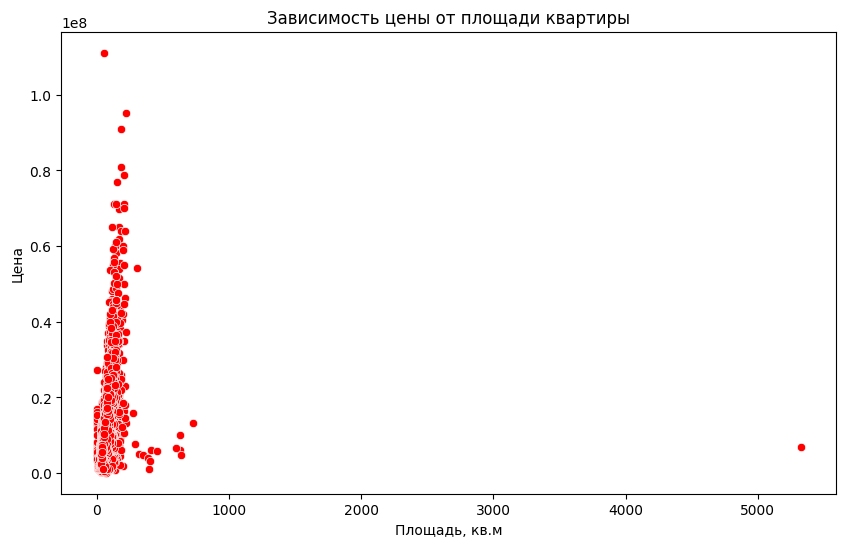

In [14]:
# Создаем точечный график
plt.figure(figsize=(10, 6))
sns.scatterplot(x='full_sq', y='price_doc', data=dtrain, color='red')
plt.title('Зависимость цены от площади квартиры')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена')
plt.show()


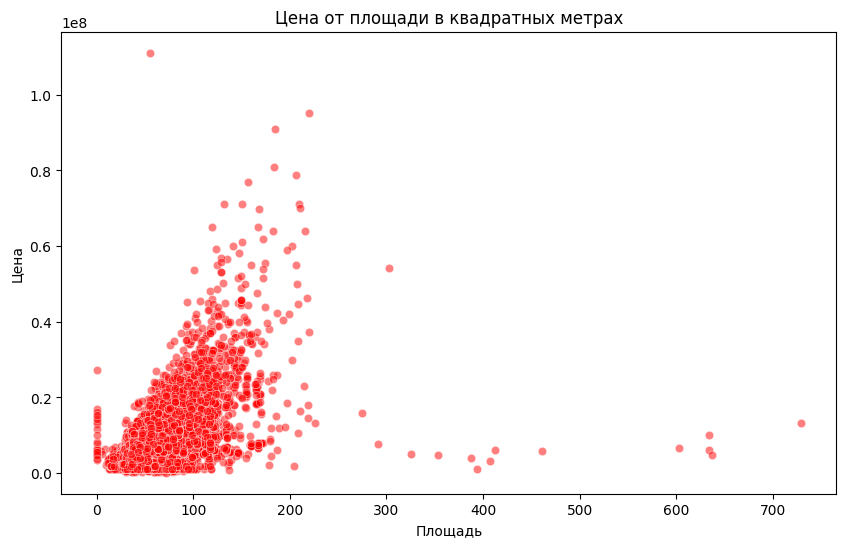

In [15]:
# Удаляем выбросы
filtered_dtrain = dtrain[dtrain['full_sq'] < 2000]

# Создаем точечный график
plt.figure(figsize=(10, 6))
sns.scatterplot(x='full_sq', y='price_doc', data=filtered_dtrain, color='red', alpha=0.5)
plt.title('Цена от площади в квадратных метрах')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()
# Этот код удалит выбросы, где площадь квартиры (full_sq) больше 2000,
# а затем построит точечный график зависимости цены квартиры от её площади.

In [16]:
# Этот код проверяет количество случаев, когда жилая площадь (life_sq)
#  больше общей площади (full_sq) в датафрейме
# Подсчитываем количество случаев, когда life_sq больше full_sq
count_life_sq_greater_than_full_sq = (dtrain['life_sq'] > dtrain['full_sq']).sum()

print(count_life_sq_greater_than_full_sq)


37


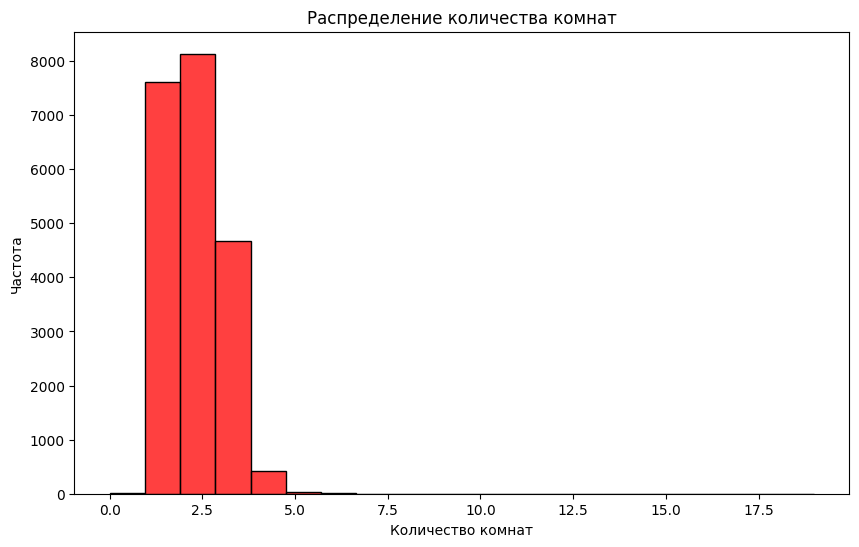

num_room
0.0       14
1.0     7602
2.0     8132
3.0     4675
4.0      418
5.0       40
6.0        9
7.0        1
8.0        3
9.0        1
10.0       2
17.0       1
19.0       1
Name: count, dtype: int64


In [17]:
"""Этот код анализирует распределение числа комнат (num_room)
 в датафрейме dtrain и строит гистограмму для визуализации. 
 Он также выводит таблицу с количеством наблюдений для каждого значения числа комнат"""
# Построение гистограммы для распределения числа комнат
plt.figure(figsize=(10, 6))
sns.histplot(dtrain['num_room'].dropna(), color='red', bins=20)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

# Вывод таблицы с количеством наблюдений для каждого значения числа комнат
print(dtrain['num_room'].value_counts().sort_index())


e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored whe

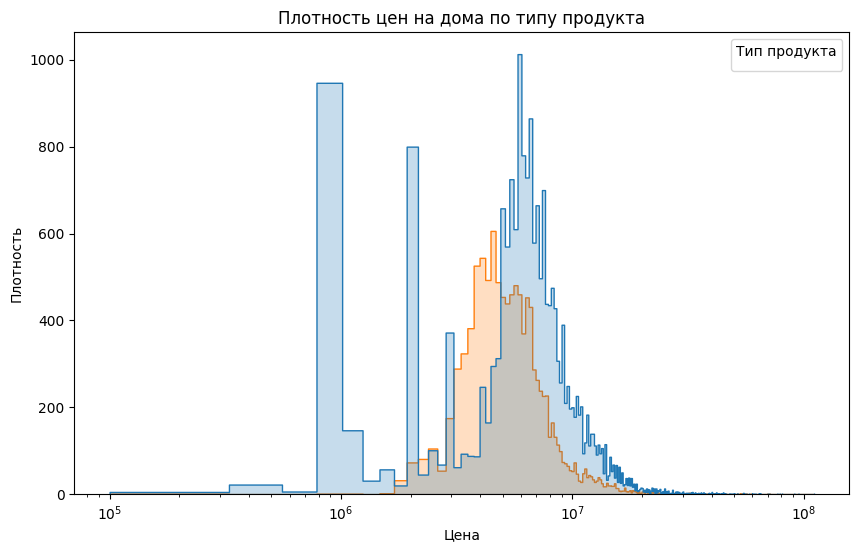

In [18]:
# Создание графика плотности цен на дома в зависимости от типа продукта
"""Этот код построит график плотности цен на дома в зависимости от типа продукта (owner-occupier или investment),
 применяя логарифмическое преобразование к оси x.
  Каждый тип продукта будет отображаться отдельно на графике с использованием разных цветов."""
plt.figure(figsize=(10, 6))
sns.histplot(data=dtrain, x='price_doc', hue='product_type', element='step', fill=True, common_norm=False, palette='tab10')
plt.xscale('log')
plt.title('Плотность цен на дома по типу продукта')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.legend(title='Тип продукта')
plt.show()


In [19]:
# Вычисление медианной цены для каждого типа продукта
median_price_by_product_type = dtrain.groupby('product_type')['price_doc'].median()

print(median_price_by_product_type)


product_type
Investment       6670000.0
OwnerOccupier    5564090.0
Name: price_doc, dtype: float64


In [20]:
# Подсчет числа наблюдений для каждого года постройки
build_year_counts = dtrain['build_year'].value_counts()

print(build_year_counts)


build_year
2014.0    919
2015.0    824
0.0       530
2013.0    464
1970.0    418
         ... 
1876.0      1
1948.0      1
1895.0      1
4965.0      1
71.0        1
Name: count, Length: 118, dtype: int64


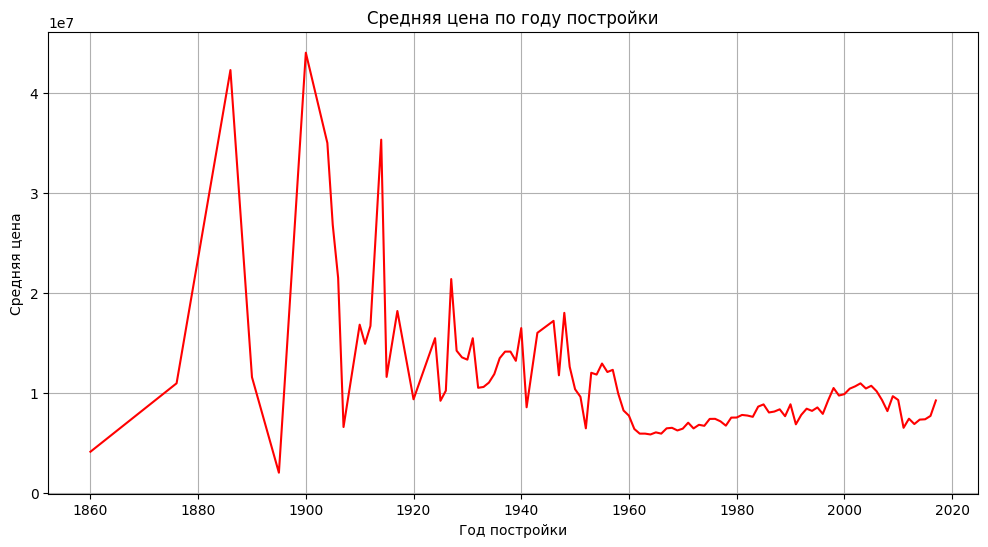

In [21]:
# Фильтрация данных по году постройки в диапазоне от 1691 до 2018
filtered_dtrain = dtrain[(dtrain['build_year'] > 1691) & (dtrain['build_year'] < 2018)]

# Группировка данных по году постройки и вычисление средней цены для каждого года
mean_build_price_by_year = filtered_dtrain.groupby('build_year')['price_doc'].mean().reset_index()

# Создание графика средней цены в зависимости от года постройки
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_build_price_by_year, x='build_year', y='price_doc', color='red')
plt.title('Средняя цена по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.show()


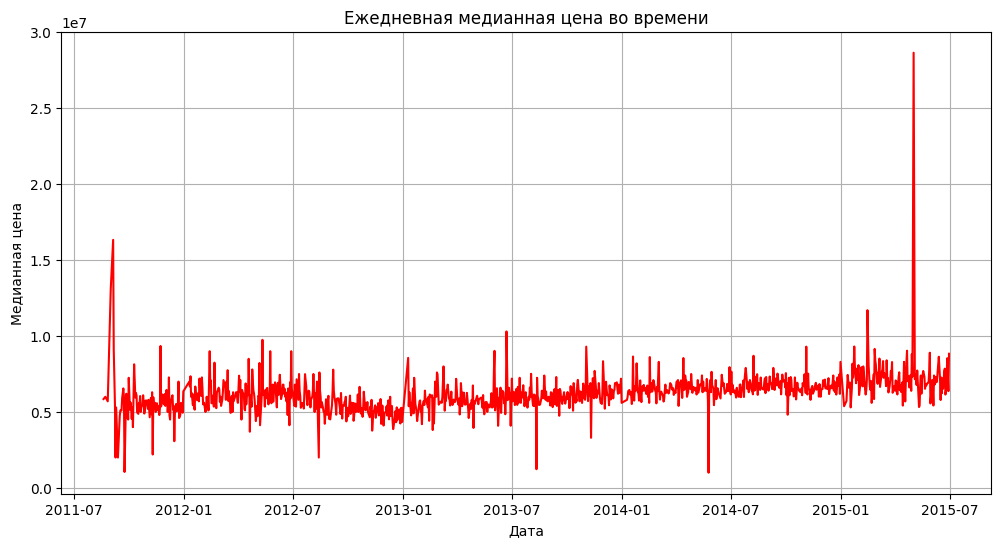

In [22]:
# Преобразование столбца timestamp в формат даты
dtrain['timestamp'] = pd.to_datetime(dtrain['timestamp'])

# Группировка данных по дням и вычисление медианной цены для каждого дня
median_price_by_day = dtrain.groupby('timestamp')['price_doc'].median().reset_index()

# Создание графика медианной цены в зависимости от времени
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_price_by_day, x='timestamp', y='price_doc', color='red')
plt.title('Ежедневная медианная цена во времени')
plt.xlabel('Дата')
plt.ylabel('Медианная цена')
plt.grid(True)
plt.show()


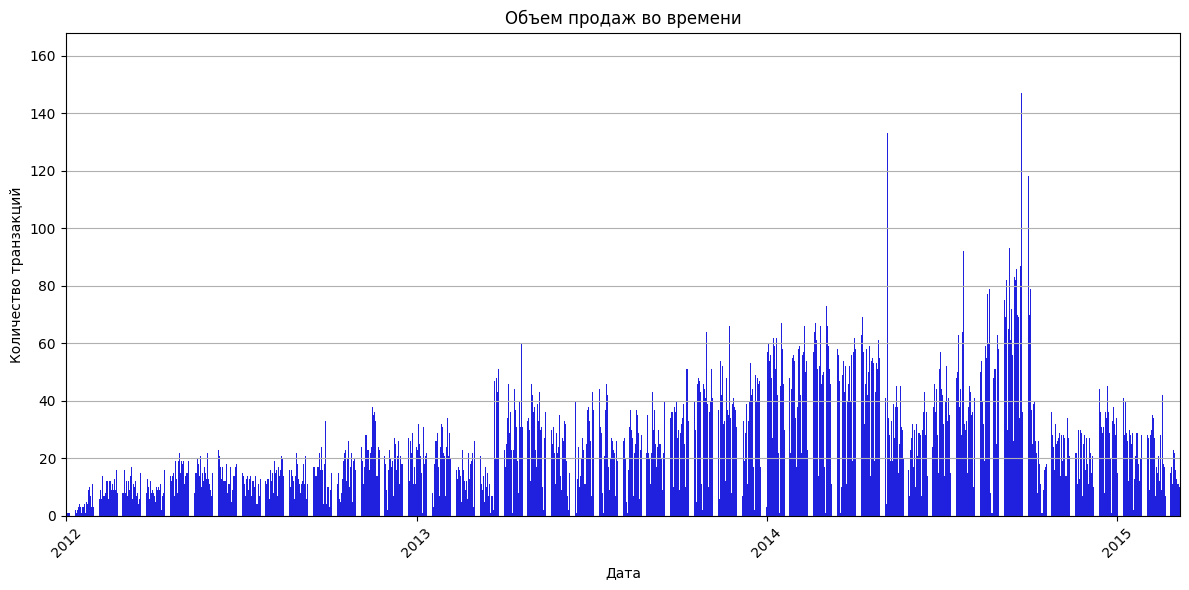

In [28]:
# Группировка данных по дням и подсчет числа транзакций для каждого дня
sales_volume_by_day = dtrain.groupby('timestamp').size().reset_index(name='transaction_count')

# Создание графика объема продаж в зависимости от времени
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_volume_by_day, x='timestamp', y='transaction_count', color='blue')
plt.title('Объем продаж во времени')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)

# Создание списка с датами для меток на оси x
date_labels = pd.date_range(start='2012-01-01', end='2015-12-31', freq='YS').strftime('%Y')

# Рассчитываем равные интервалы для каждого года
ticks_position = [i * 365 for i in range(len(date_labels))]

# Устанавливаем метки оси x и их позиции
plt.xticks(ticks=ticks_position, labels=date_labels)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
e:\conda1\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will nee

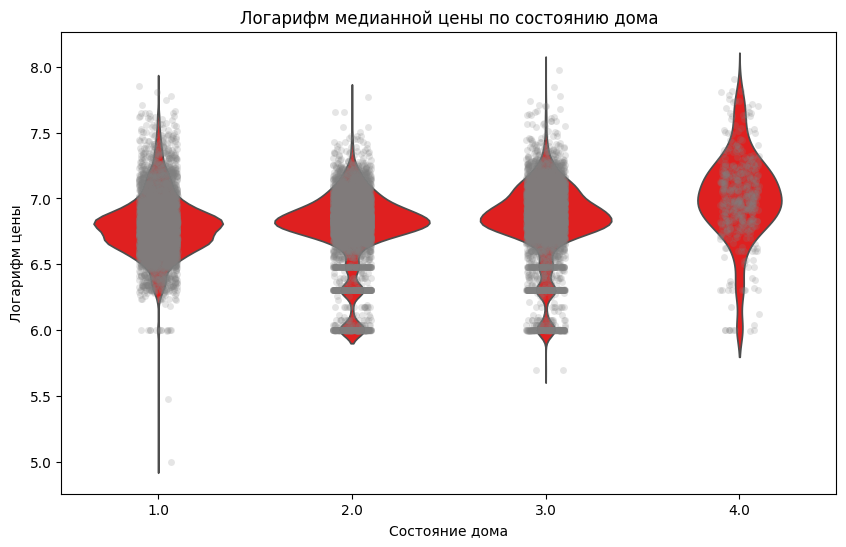

In [29]:
# Фильтрация данных, чтобы исключить наблюдения с отсутствующим значением состояния
filtered_dtrain = dtrain.dropna(subset=['state'])

# Создание графика с использованием библиотеки seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x=filtered_dtrain['state'], y=filtered_dtrain['price_doc'].apply(np.log10), color='red', inner=None)
sns.stripplot(x=filtered_dtrain['state'], y=filtered_dtrain['price_doc'].apply(np.log10), color='grey', alpha=0.2)
plt.title('Логарифм медианной цены по состоянию дома')
plt.xlabel('Состояние дома')
plt.ylabel('Логарифм цены')
plt.show()